## Lab Comparing Regression models

In [94]:
import pandas as pd
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

### DATA WRANGLING

In [ ]:
df = df.dropna()
df = df.drop_duplicates()
df.info()

In [140]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import numpy as np

In [141]:
categoricals = df.select_dtypes(include=object)
numericals = df.select_dtypes(include = np.number)

In [142]:
ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size","effective_to_date"])

In [99]:
from sklearn.preprocessing import OrdinalEncoder

In [100]:
ordinals["coverage"]

0           basic
1           basic
2           basic
3        extended
4         premium
           ...   
10684     premium
10685       basic
10686    extended
10687     premium
10688       basic
Name: coverage, Length: 10497, dtype: object

### ENCODING

#### Ordinals with OrdinalEncoder

In [143]:
enc = OrdinalEncoder(categories=[["basic","extended","premium"]])
ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])

enc = OrdinalEncoder(categories=[["college", "bachelor", "high school or below", "doctor", "master"]])
ordinals["education"] = enc.fit_transform(ordinals[["education"]])

enc = OrdinalEncoder(categories=[["medsize", "small", "large"]])
ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])

In [102]:
ordinals

,coverage,education,vehicle_size
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,2.0,1.0,0.0
...,...,...,...
10684,2.0,1.0,0.0
10685,0.0,0.0,0.0
10686,1.0,1.0,0.0
10687,2.0,0.0,0.0


#### Nominals with get_dummies

In [144]:
nominals = pd.get_dummies(nominals, dtype=int)

In [104]:
nominals

,region_central,region_east,region_north west,region_west region,response_no,response_yes,month_feb,month_jan,employment_status_disabled,employment_status_employed,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,1,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,0,0,1,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
10686,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
10687,0,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [145]:
categorical_coded = pd.concat([ordinals,nominals], axis=1) 
# concatinating with pd.concat along the axis 1 (addting columns)

In [106]:
categorical_coded

,coverage,education,vehicle_size,region_central,region_east,region_north west,region_west region,response_no,response_yes,month_feb,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0.0,0.0,0.0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,0,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0.0,1.0,0.0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,1.0,0.0,0.0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,2.0,1.0,0.0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2.0,1.0,0.0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,0.0,0.0,0.0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
10686,1.0,1.0,0.0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
10687,2.0,0.0,0.0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0


In [146]:
final_df = pd.concat([numericals,categorical_coded], axis=1)


In [ ]:
final_df.isnull().sum() # checking for nulls

### SPLIT

In [148]:
X = final_df.drop(columns = ["total_claim_amount"]) # everything but y variable
y = final_df[["total_claim_amount"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100)

In [151]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,vehicle_size,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
4488,9435,32470,129,13,19,0,8,1.0,1.0,2.0,...,0,0,1,0,0,0,0,0,1,0
3591,6165,60884,77,10,56,0,4,1.0,2.0,1.0,...,0,1,0,0,1,0,0,0,0,0
4089,4472,53519,111,7,37,0,1,0.0,3.0,0.0,...,0,0,1,0,0,0,0,0,1,0
921,13450,71794,126,28,80,0,2,1.0,2.0,0.0,...,1,0,0,0,0,0,0,0,1,0
8497,3443,16208,93,22,20,0,1,1.0,1.0,2.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2476,47918,62,2,51,0,1,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
79,9312,75986,115,11,44,0,3,2.0,2.0,0.0,...,0,0,1,0,1,0,0,0,0,0
8150,2735,96314,69,2,76,0,1,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
7015,5349,89158,67,34,71,0,6,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0


### TRANSFORM - PowerTransform

### x - scaler

In [152]:
# Iniciated the PowerTransformer my my case # "pt is the scaler 
pt = PowerTransformer()

# Fit the transformer to my X_train data 
pt.fit(X_train)

# Transform X_train using the fitted transformer
X_train_scaled = pt.transform(X_train)

# LATER Transform X_test using the fitted transformer
X_test_scaled = pt.transform(X_test) 

### y - scaler

In [153]:
pt = PowerTransformer()

In [154]:
pt.fit(y_train) # fit again on x as never done before

y_train_scaled = pt.transform(y_train) 
y_test_scaled = pt.transform(y_test)

### RUN THE MODEL - LinearRegression X_train_scaled, y_train_scaled

In [155]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train_scaled) 

In [156]:
X_train_scaled = pd.DataFrame(X_train_scaled)
y_test_scaled = pd.DataFrame(y_test_scaled)
train = pd.concat([X_train_scaled,y_test_scaled], axis = 1)
train = train.dropna()

In [ ]:
train

In [157]:
X_train_scaled = train.iloc[:,:58]
y_test_scaled = train.iloc[:,-1]
# we scale the target when there is a skewed disctirbution of it. 
# therefore in cases with even disctr. we do not need to scale the target

In [118]:
model.coef_

array([[ 1.71315775e-02, -1.40942131e-02,  3.30190644e-01,
         1.01357717e-02,  3.61694088e-04, -4.67718075e-03,
        -3.17657965e-03,  2.80574376e-02,  1.28881747e-02,
         9.97294428e-03, -6.26200552e+12, -3.95225117e+12,
        -6.27476040e+12, -6.61360925e+12, -1.68122575e+12,
        -1.68122575e+12,  3.68976725e+12,  3.68976725e+12,
         2.03983270e+12,  4.87019961e+12,  2.07114928e+12,
         1.65983896e+12,  4.41610154e+12,  1.09181177e+12,
         1.09181177e+12,  6.40563136e+11,  7.82036569e+11,
         6.14943025e+11, -4.45401746e+10, -6.23112176e+10,
        -5.63749950e+10, -3.44924025e+11, -2.54637100e+12,
         3.87001452e+12, -1.04025300e+12, -1.35001247e+12,
        -1.70659162e+12, -1.50329180e+11, -1.83930055e+11,
        -2.12169934e+11, -2.14845478e+12, -3.49502637e+12,
        -3.18306551e+12, -1.61304120e+12, -1.52624972e+12,
        -1.20799336e+12, -1.03145582e+12, -1.05505341e+13,
        -9.80110333e+12, -8.63627650e+12, -7.72548981e+1

In [119]:
model.intercept_

array([-0.00184637])

### MAKING PREDICTIONS with X_test_scaled

In [158]:
y_pred = model.predict(X_test_scaled)
# ------- i test it with the test set ----------

In [159]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,-1.196579
1,0.253159
2,0.667923
3,-1.489548
4,0.663315
...,...
2620,0.243118
2621,-0.638779
2622,0.537064
2623,-0.080826


In [122]:
y_test = y_test.reset_index(drop=True)

#### TRANSFORM test 

### RESIDUALS - Understand the scale of the error

In [160]:
resiudals_df = pd.concat([y_test,y_pred],axis=1) 


In [161]:
residuals_df = resiudals_df.rename(columns={"total_claim_amount":"y_test", 0:"y_pred"})

In [162]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [163]:
round(residuals_df,2)

,y_test,y_pred,residual
3234,132.0,NaN,NaN
7043,340.0,NaN,NaN
8469,566.0,NaN,NaN
5086,131.0,NaN,NaN
7926,604.0,NaN,NaN
...,...,...,...
2617,NaN,-0.09,NaN
2618,NaN,-0.69,NaN
2619,NaN,0.14,NaN
2620,NaN,0.24,NaN


### Calculating metrics

In [164]:
mean_error = residuals_df["residual"].mean()

In [165]:
round(mean_error,2)
# mean_error: has a weakness cz it cancals out the errors 
# normally not used because the above

436.6

In [166]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [167]:
round(mse(y_test,y_pred),2)

269115.37

In [168]:
round(mae(y_test,y_pred),2)


432.13

In [169]:
rmse = mse(y_test,y_pred, squared = False) # in correct units
round(rmse,2)

518.76

### Computing R2_score
- tries to explain how good your model is at explaining the task
- Provides a measurement of the “explanatory” power of a model (shows how much variability of y can be explained by the independent features)

In [170]:
from sklearn.metrics import r2_score

#### Computing R2_score for test_set

In [172]:
round(r2_score(y_test_scaled, y_pred),2) 

0.81

#### Computing R2_score for train_set

In [136]:
y_pred_train = pd.DataFrame(model.predict(X_train_scaled))

In [180]:
r2_score(y_train_scaled,y_pred_train)

-1.2712848526952178e+26

### Feature importance
- In order to check which independent features are more relevant to your model, compare the absolute value of each coefficient.
- Only valid if all the features are in the same scale. NOT THE CASE IN THIS EXAMPLE y was not scaled!


In [ ]:
feature_names = list(X_train.columns)

In [ ]:
coefficients = model.coef_

In [ ]:
coefficients = [i for i in coefficients[0]]

In [ ]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

In [ ]:
import seaborn as sns #  Seaborn data visualization library.

In [ ]:
sns.barplot(x = fi_df["name"],y =fi_df["coeff"])

### Comparing regression models

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#### Variance threshold method

In [ ]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features


X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()


selector = VarianceThreshold() # Default threshold value is 0
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final number of numerical columns: ",X_train.shape)
print()
X_train

#### Corrolation matrix

['monthly_premium_auto', 'total_claim_amount']


,monthly_premium_auto,total_claim_amount
0,61,292
1,64,744
2,100,480
3,97,484
4,117,707
...,...,...
10684,253,1214
10685,65,273
10686,201,381
10687,158,618


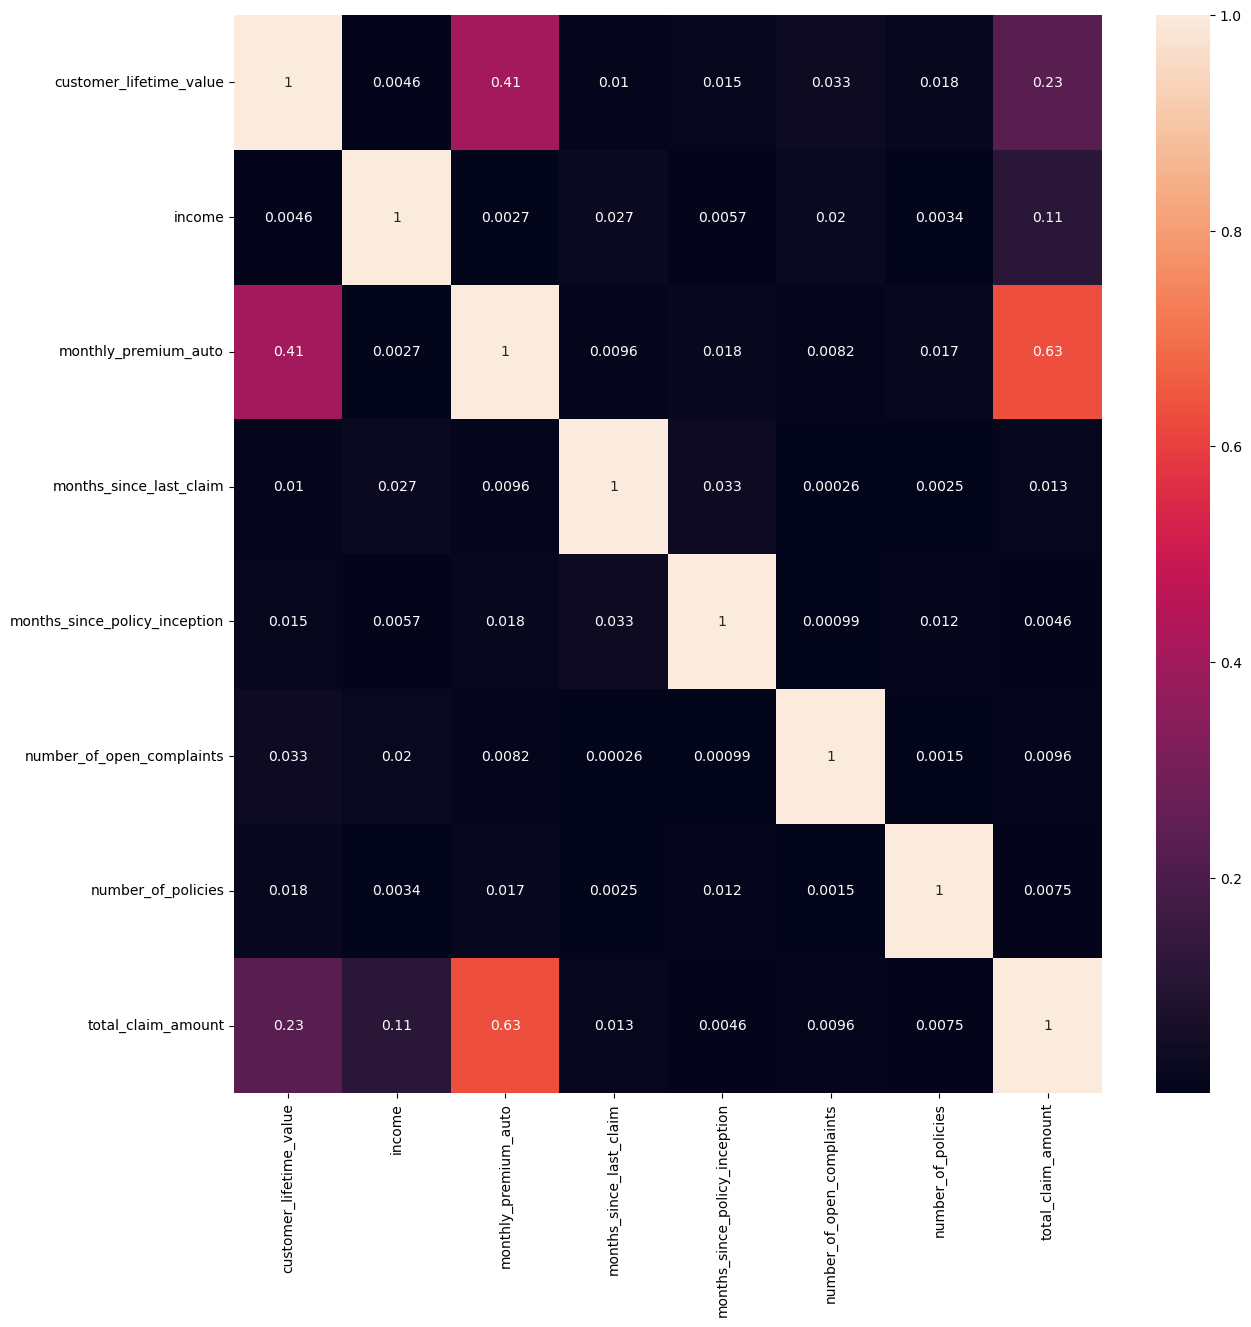

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

c = df.select_dtypes(include = np.number)
c = abs(c.corr())
#c

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['total_claim_amount'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

df[cols_to_keep]

### RFI

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import pandas as pd

lm = LinearRegression()

selector = RFE(lm, n_features_to_select=8, step=1, verbose=1)  # Step is how many features to add or drop every time
selector.fit(X_train_scaled, y_train_scaled)

kept_features = selector.get_support(indices=True)  # returns an array of integers corresponding to nonremoved features
kept_features = list(X_train_scaled.iloc[:, kept_features].columns)

X_train_scaled = selector.transform(X_train_scaled)
X_test_scaled = selector.transform(X_test_scaled)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=kept_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=kept_features)

print("Final selected features: ")
display(X_train_scaled)

## Embedded Methods

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

In [53]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train=imp_mean.fit_transform(X_train)
X_test = imp_mean.fit_transform(X_test)

## OLS - ordinary least squares

In [72]:
lr =LinearRegression()
lr.fit(X_train, y_train)
print(f"{lr.__class__.__name__}: Train -> {lr.score(X_train, y_train)}, Test -> {lr.score(X_test, y_test)}")

LinearRegression: Train -> 0.7712211567738343, Test -> 0.7669100659413655


<b> A lasso model can drop features and be a feature selection technique <b>

In [73]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
lasso =Lasso(alpha=0)

lasso.fit(X_train, y_train)
print(f"{lasso.__class__.__name__}: Train -> {lasso.score(X_train, y_train)}, Test -> {lasso.score(X_test, y_test)}")

Lasso: Train -> 0.7712211567738342, Test -> 0.7669100659413661


<b> Ridge

In [83]:
ridge=Ridge(alpha=1) #

ridge.fit(X_train, y_train)
print(f"{ridge.__class__.__name__}: Train -> {ridge.score(X_train, y_train)}, Test -> {ridge.score(X_test, y_test)}")

Ridge: Train -> 0.7712210306561372, Test -> 0.7669168108059428


In [65]:
model=ElasticNet(alpha=0)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.7712211567738342, Test -> 0.7669100659413661


## Function that takes a list of models and trains (and tests) them

In [79]:
def model_training(X_train, y_train, X_test):
    # Fit models
    lr.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    
    # Predictions
    lr_predictions = lr.predict(X_test)
    lasso_predictions = lasso.predict(X_test)
    ridge_predictions = ridge.predict(X_test)
    
    return lr, lasso, ridge, lr_predictions, lasso_predictions, ridge_predictions

In [184]:
import pprint

combined = model_training(X_train, y_train, X_test)
pprint.pprint(combined)

(LinearRegression(),
 Lasso(alpha=0),
 Ridge(alpha=1),
 array([[160.36958864],
       [492.64887074],
       [597.17674224],
       ...,
       [512.58738198],
       [372.57872303],
       [203.06786877]]),
 array([160.36958864, 492.64887074, 597.17674224, ..., 512.58738198,
       372.57872303, 203.06786877]),
 array([[160.51332442],
       [492.64287014],
       [597.17892215],
       ...,
       [512.56453171],
       [372.5388917 ],
       [203.26336743]]))


In [91]:
combined_df = pd.DataFrame(combined)


,0
count,6
unique,6
top,LinearRegression()
freq,1
